In [7]:
#1번
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar import irf

df=pd.read_excel("dataforhw3.xlsx", engine = "openpyxl", index_col=0)
df=df.iloc[[2,5,13,20],:]
dft=df.T
dft=dft[['국내총생산에 대한 지출','총자본형성','　　　　　　가계','재화와 서비스의 수출']]
dft_log=np.log(dft).diff().dropna()
model = VAR(dft_log)
results = model.fit(4)
results.summary()


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 21, May, 2021
Time:                     23:05:53
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -29.5849
Nobs:                     72.0000    HQIC:                  -30.8791
Log likelihood:           801.809    FPE:                1.71158e-14
AIC:                     -31.7351    Det(Omega_mle):     7.33105e-15
--------------------------------------------------------------------
Results for equation 국내총생산에 대한 지출
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.009490         0.003759            2.524           0.012
L1.국내총생산에 대한 지출        -0.232010         0.232534           -0.998           0.318
L1.총자본형성                0.006114         0.03

In [11]:
#2번
grc=results.test_causality('국내총생산에 대한 지출', '총자본형성', kind='f')
grc.summary()

#p value(=0.383) > 0.05 이므로 capital은 GDP를 granser-cause하지 않는다.

Test statistic,Critical value,p-value,df
1.049,2.413,0.383,"(4, 220)"


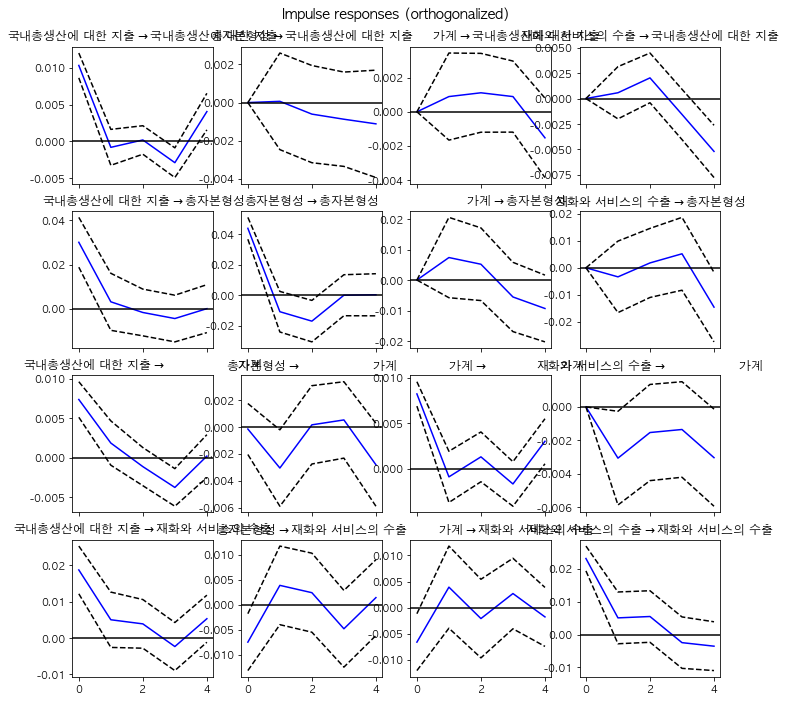

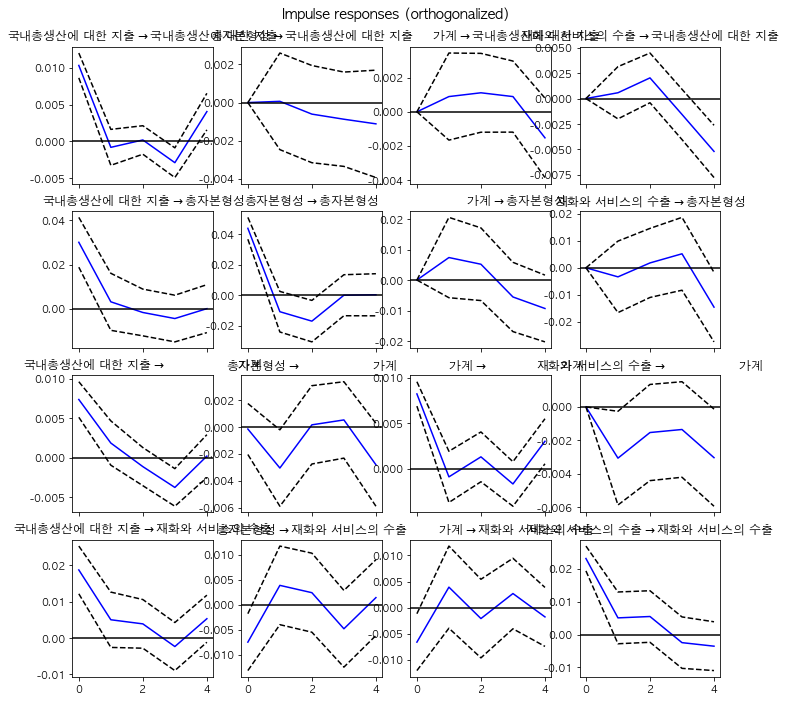

In [13]:
#3번
#impulse response 구하기|
irf = results.irf(4)
irf.plot(orth=True)

#a->b 라고 하면, a는 b에게 x시점에서 y만큼 영향을 끼친다.
#예를 들어, 첫번째 줄 맨 오른쪽 : 수출은 GDP에 0.5시기에 (0<x<1이라 하면) 약 0.002만큼의 영향을 끼친다.

In [14]:
#4번
for n in range(4, 15):
    model1 = VAR(dft_log)
    results1 = model1.fit(n)
    grc1=results1.test_causality('국내총생산에 대한 지출', '총자본형성')
    print(grc1.pvalue)
    
model2 = VAR(dft_log)
results2 = model2.fit(9)

#--> order를 바꿔서 변화가 있는지 봐야하므로 order를 4부터 15까지 해보았음(그 이후는 너무 커져서)
#p value를 확인해야 granser-cause의 변화를 알 수 있으므로 p value를 출력해보았다. -> lag 9에서 0.019..로 0.05보다 작으므로 lag9일때
#capital이 gdp에 granser-cause 하는 것을 알 수 있다. 


0.3830028145144929
0.6940871512247258
0.40903521328886844
0.09998162665694564
0.09665515111561675
0.019119550186050053
0.09281481898351587
0.12735638406088395
0.16641817766449565
0.2547403639794597
8.359927466610907e-05


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Library/Frameworks/Python.framework/Ver

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arch/univariate/base.py:316: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0607. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/arch/__future__/_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Iteration:      1,   Func. Count:     33,   Neg. LLF: 37.697187516323964
Iteration:      2,   Func. Count:     69,   Neg. LLF: 1236.0358433347003
Iteration:      3,   Func. Count:    102,   Neg. LLF: -12.075770878647681
Iteration:      4,   Func. Count:    134,   Neg. LLF: -9.26869359706078
Iteration:      5,   Func. Count:    169,   Neg. LLF: 26.375055886868182
Iteration:      6,   Func. Count:    202,   Neg. LLF: -18.402006669776
Iteration:      7,   Func. Count:    235,   Neg. LLF: -17.940214173706885
Iteration:      8,   Func. Count:    268,   Neg. LLF: -19.070763515211986
Iteration:      9,   Func. Count:    300,   Neg. LLF: -19.22941545416375
Iteration:     10,   Func. Count:    332,   Neg. LLF: -19.261627762696115
Iteration:     11,   Func. Count:    364,   Neg. LLF: -19.324910396181224
Iteration:     12,   Func. Count:    396,   Neg. LLF: -19.337779656224235
Iteration:     13,   Func. Count:    428,   Neg. LLF: -19.339668103958193
Iteration:     14,   Func. Count:    460,   Neg

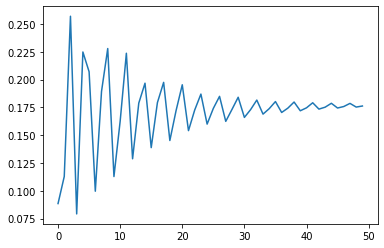

In [22]:
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# split into train/test
n_test=50
train, test = data[:-n_test], data[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
#var = [i*0.01 for i in range(0,100)]
#pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()
